## Predicting the charges of insurance for an individual based on the data available

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                                  ## we want to ignore warnings as they 
                                                 ##    can be annoying during development.

warnings.filterwarnings('ignore')


In [6]:
data=pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## EDA

STEP-1: Viewing the data and related information.

In [7]:
df=pd.DataFrame(data)

In [8]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [10]:
shape=df.shape
print("The shape of the data is:",shape)



The shape of the data is: (1338, 7)


In [11]:
info=df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
describe=df.describe()
print("The description of the data is:",describe)   

The description of the data is:                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [13]:
null_values=df.isnull().sum()
null_values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
numeric_columns=df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['age', 'bmi', 'children', 'charges']

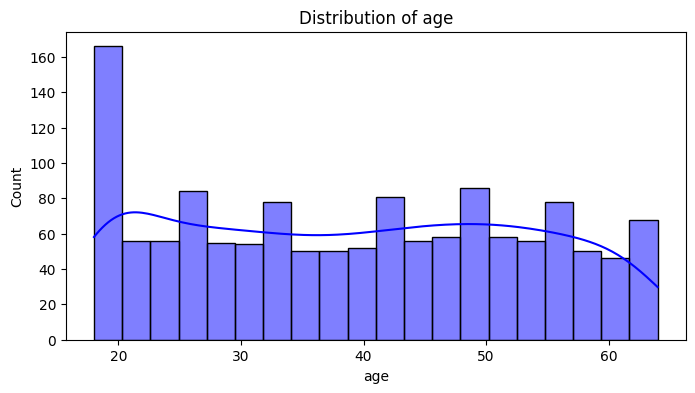

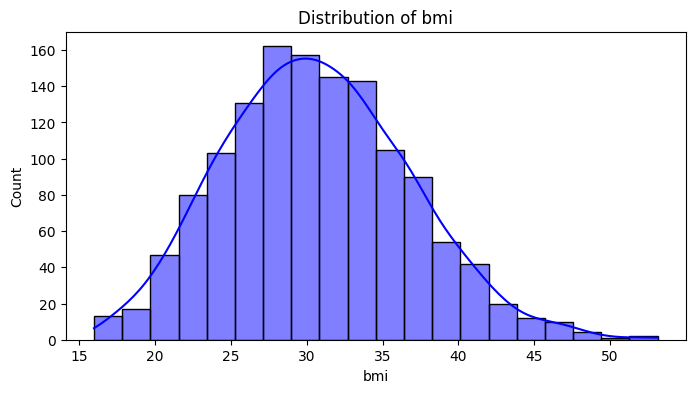

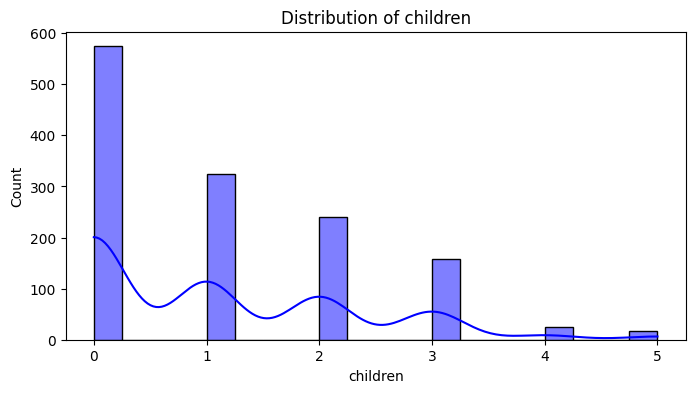

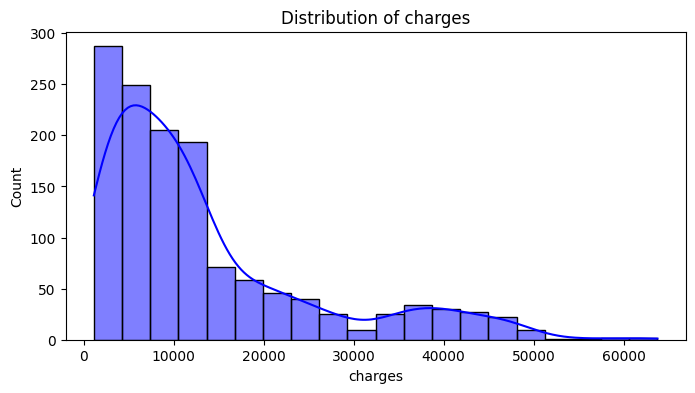

In [16]:
for col in numeric_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, color='blue',bins=20)
    plt.title(f'Distribution of {col}')


<Axes: xlabel='children', ylabel='count'>

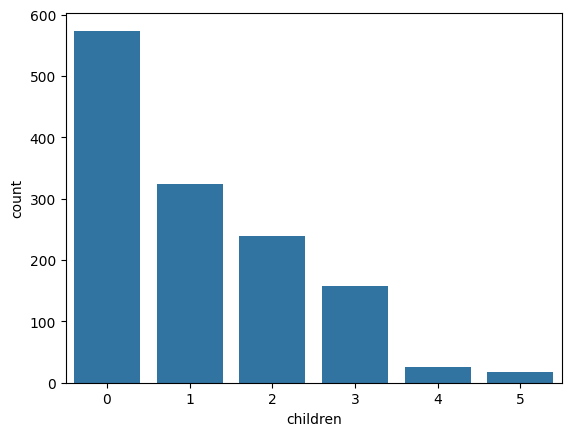

In [17]:
sns.countplot(x=df['children'])

<Axes: xlabel='smoker', ylabel='count'>

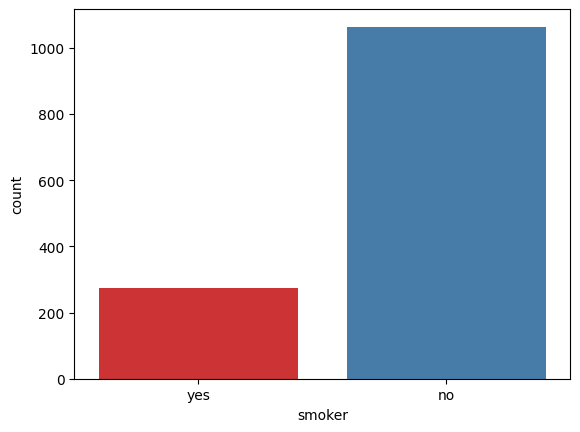

In [18]:
sns.countplot(x=df['smoker'], palette='Set1')

<Axes: xlabel='region', ylabel='count'>

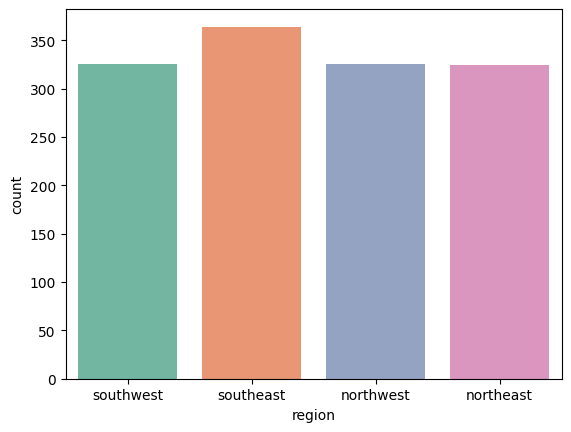

In [19]:
sns.countplot(x=df['region'], palette='Set2')

<Axes: xlabel='sex', ylabel='count'>

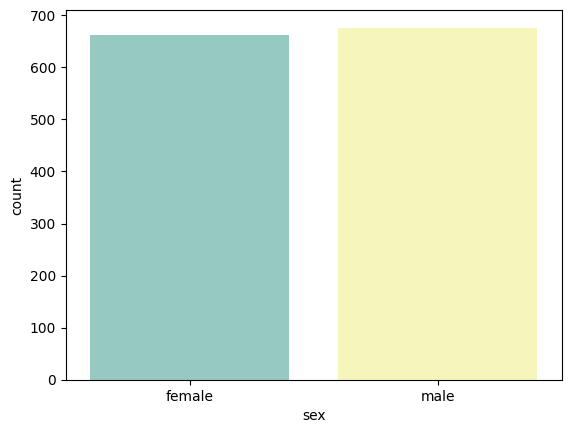

In [20]:
sns.countplot(x=df['sex'], palette='Set3')

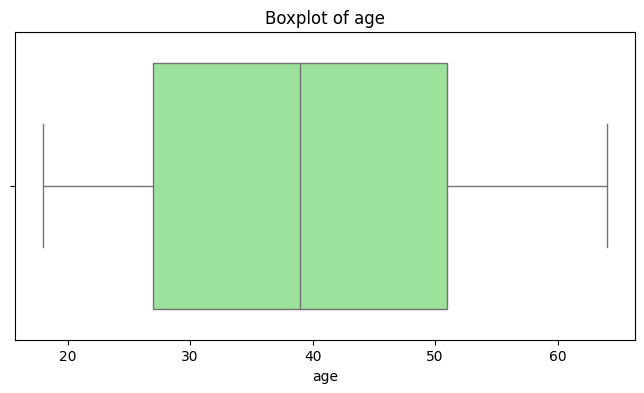

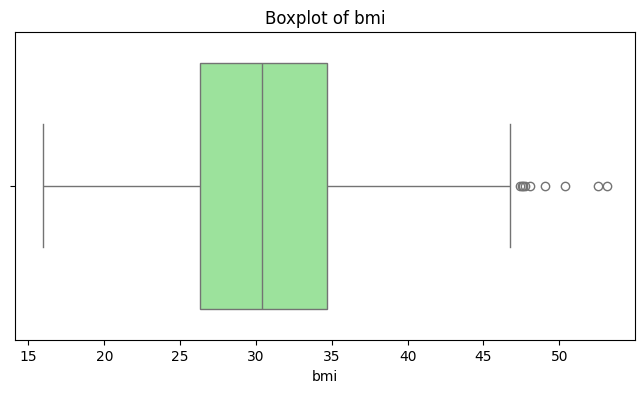

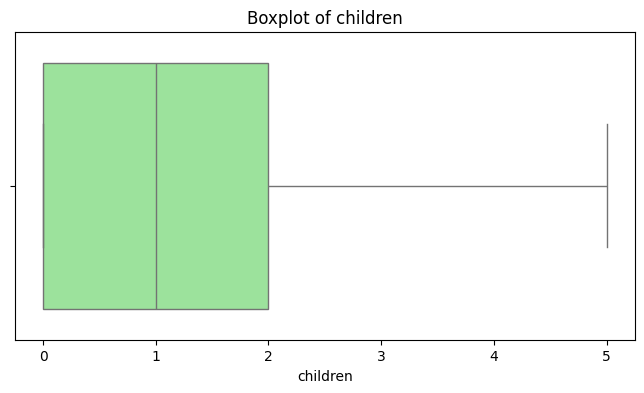

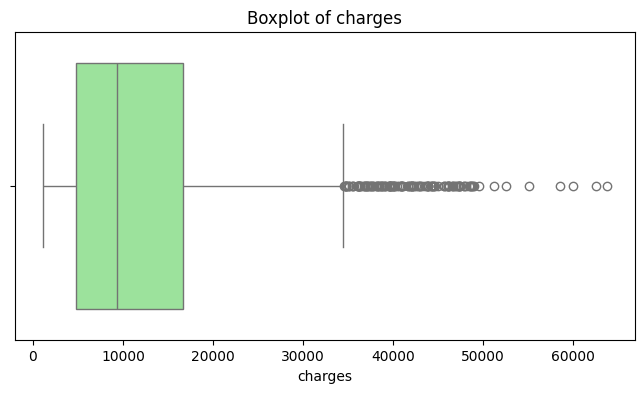

In [21]:
for col in numeric_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

<Axes: >

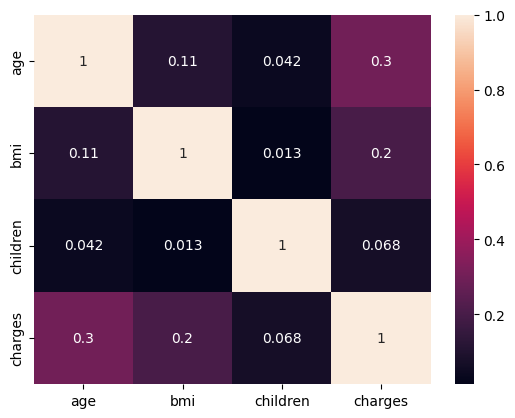

In [22]:
plt.Figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Data cleaning and preprocessing

In [23]:
df_cleaned=df.copy()
## Remove null values
## Reove duplicates
## Handle outliers
## Encode categorical variables


In [24]:
df_cleaned.shape

(1338, 7)

In [25]:
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.shape

(1337, 7)

In [26]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [27]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Encoding the non-numeric columns like sex etc
    1. lable encoding when only two categories are present.
    2. one-hot encoding is done when multiple categories are present.

In [28]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [29]:
df_cleaned['sex']=df_cleaned['sex'].map({"male":1,"female":0})

In [30]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [31]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [32]:
df_cleaned['smoker']=df_cleaned['smoker'].map({"yes":1,"no":0})
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [33]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Since there are multiple categories in the region section so we apply one hot encoding. 
for applying one hot encoding we use- "pd.get_dummies(data,col=['col_name],drop_first=True)"
after getting separare columns for varios categories we get data in true and false so we convert it to 0 or 1. 

In [34]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)
df_cleaned

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,True,False,False
1334,18,0,31.920,0,0,2205.98080,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,False,True


In [35]:
df_cleaned=df_cleaned.astype(int)      ## Convert all columns to integer type
df_cleaned.dtypes

age                 int64
sex                 int64
bmi                 int64
children            int64
smoker              int64
charges             int64
region_northwest    int64
region_southeast    int64
region_southwest    int64
dtype: object

In [36]:
df_cleaned.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0


## Feature engineering and extraction

<Axes: xlabel='bmi', ylabel='Count'>

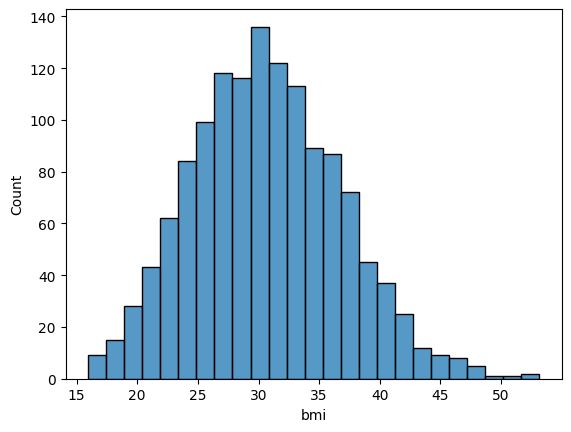

In [37]:
sns.histplot(df['bmi'])

BMI Categories Overview
1. Underweight: A BMI less than 18.5. This category may indicate insufficient nutrition or underlying health issues that require    attention.
2. Normal Weight: A BMI between 18.5 and 24.9. This range is associated with the lowest risk of chronic diseases and is considered optimal for most adults.
3. Overweight: A BMI between 25 and 29.9. Individuals in this category may have an increased risk of health issues related to excess weight.
4. Obesity: A BMI of 30 or higher.

In [38]:
## Creating bins for BMI categories
df_cleaned['bmi_categories']=pd.cut(df_cleaned['bmi'],bins=[0,18.5,24.9,29.9,float('inf')],
                                   labels=['Underweight','Normal weight','Overweight','Obesity'])
df_cleaned

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_categories
0,19,0,27,0,1,16884,0,0,1,Overweight
1,18,1,33,1,0,1725,0,1,0,Obesity
2,28,1,33,3,0,4449,0,1,0,Obesity
3,33,1,22,0,0,21984,1,0,0,Normal weight
4,32,1,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0,Obesity
1334,18,0,31,0,0,2205,0,0,0,Obesity
1335,18,0,36,0,0,1629,0,1,0,Obesity
1336,21,0,25,0,0,2007,0,0,1,Overweight


In [39]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['bmi_categories'],drop_first=True)
df_cleaned

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_categories_Normal weight,bmi_categories_Overweight,bmi_categories_Obesity
0,19,0,27,0,1,16884,0,0,1,False,True,False
1,18,1,33,1,0,1725,0,1,0,False,False,True
2,28,1,33,3,0,4449,0,1,0,False,False,True
3,33,1,22,0,0,21984,1,0,0,True,False,False
4,32,1,28,0,0,3866,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0,False,False,True
1334,18,0,31,0,0,2205,0,0,0,False,False,True
1335,18,0,36,0,0,1629,0,1,0,False,False,True
1336,21,0,25,0,0,2007,0,0,1,False,True,False


In [40]:
df_cleaned=df_cleaned.astype(int)
df_cleaned

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_categories_Normal weight,bmi_categories_Overweight,bmi_categories_Obesity
0,19,0,27,0,1,16884,0,0,1,0,1,0
1,18,1,33,1,0,1725,0,1,0,0,0,1
2,28,1,33,3,0,4449,0,1,0,0,0,1
3,33,1,22,0,0,21984,1,0,0,1,0,0
4,32,1,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0,0,0,1
1334,18,0,31,0,0,2205,0,0,0,0,0,1
1335,18,0,36,0,0,1629,0,1,0,0,0,1
1336,21,0,25,0,0,2007,0,0,1,0,1,0


## Feature scaling

1. Identifying the features to be scaled 
2. deciding the method of scaling (MinMax,Robust,MaxAbs,Z-standartization)
3. applying

In [41]:
from sklearn.preprocessing import StandardScaler
cols=['age','bmi','children']
scaler=StandardScaler()
df_cleaned[cols]=scaler.fit_transform(df_cleaned[cols])
df_cleaned


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_categories_Normal weight,bmi_categories_Overweight,bmi_categories_Obesity
0,-1.440418,0,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,1,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,1,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,1,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,1,-0.354547,-0.909234,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,1,-0.027743,1.580143,0,10600,1,0,0,0,0,1
1334,-1.511647,0,0.135659,-0.909234,0,2205,0,0,0,0,0,1
1335,-1.511647,0,0.952670,-0.909234,0,1629,0,1,0,0,0,1
1336,-1.297958,0,-0.844753,-0.909234,0,2007,0,0,1,0,1,0


## Feature extraction 

   Done on the basis of correlation 
       1. pearson correlation 
       2. spearman correlation
       3. kendall's correlation

In [47]:
from scipy.stats import pearsonr   ## Scipy library provides various functions for statistical analysis.
corr_check_features=[
    'age','bmi','children','smoker','region_northwest','region_southeast','region_southwest',
    'bmi_categories_Normal weight','bmi_categories_Overweight','bmi_categories_Obesity','sex'
    ]
correlations={
    feature: pearsonr(df_cleaned[feature],df_cleaned['charges'])[0] 
    for feature in corr_check_features
}
correlations_df = pd.DataFrame(list(correlations.items()),columns=['Feature','Pearson Correlation with Charges'])
correlations_df.sort_values(by='Pearson Correlation with Charges',ascending=False)


,Feature,Pearson Correlation with Charges
3,smoker,0.787234
0,age,0.298309
9,bmi_categories_Obesity,0.200348
1,bmi,0.196236
5,region_southeast,0.073577
2,children,0.067390
10,sex,0.058046
4,region_northwest,-0.038695
6,region_southwest,-0.043637
7,bmi_categories_Normal weight,-0.104042


In [51]:
categorical_features=[
    'smoker','region_northwest','region_southeast','region_southwest',
    'bmi_categories_Normal weight','bmi_categories_Overweight','bmi_categories_Obesity','sex'
    ]

In [57]:
import pandas as pd
from scipy.stats import chi2_contingency 
import numpy as np 
import seaborn as sns

alpha=0.05
# Equal-width bins (e.g., 4 bins)
df_cleaned['charges_binned_equal'] = pd.cut(df_cleaned['charges'], bins=4, labels=False)
chi2_result={}

for features in categorical_features:
    contingency_table=pd.crosstab(df_cleaned[features],df_cleaned['charges_binned_equal'])
    chi2,p_value,dof,expecteed=chi2_contingency(contingency_table)
    decision='reject NUll(Keep feature)'if p_value < alpha else 'Fail to reject Null(Drop feature)'
    chi2_result[features]={
        'chi2_statistics':chi2,
        'p_value':p_value,
        'decision':decision
    }
chi2_df=pd.DataFrame(chi2_result).T
chi2_df=chi2_df.sort_values(by='p_value')
chi2_df



,chi2_statistics,p_value,decision
smoker,918.577819,0.0,reject NUll(Keep feature)
bmi_categories_Obesity,170.68609,0.0,reject NUll(Keep feature)
bmi_categories_Overweight,83.354101,0.0,reject NUll(Keep feature)
bmi_categories_Normal weight,39.526341,0.0,reject NUll(Keep feature)
region_southeast,13.502398,0.003667,reject NUll(Keep feature)
sex,11.212656,0.01063,reject NUll(Keep feature)
region_southwest,6.611919,0.085352,Fail to reject Null(Drop feature)
region_northwest,5.61161,0.132113,Fail to reject Null(Drop feature)


In [63]:
final_df =df_cleaned[['smoker','bmi_categories_Normal weight','bmi_categories_Overweight','bmi_categories_Obesity','sex','region_southwest'
    ]]
final_df


,smoker,bmi_categories_Normal weight,bmi_categories_Overweight,bmi_categories_Obesity,sex,region_southwest
0,1,0,1,0,0,1
1,0,0,0,1,1,0
2,0,0,0,1,1,0
3,0,1,0,0,1,0
4,0,0,1,0,1,0
...,...,...,...,...,...,...
1333,0,0,0,1,1,0
1334,0,0,0,1,0,0
1335,0,0,0,1,0,0
1336,0,0,1,0,0,1
